In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Text(0.5, 1.0, 'TD óptimo por canal M2 Conectada')

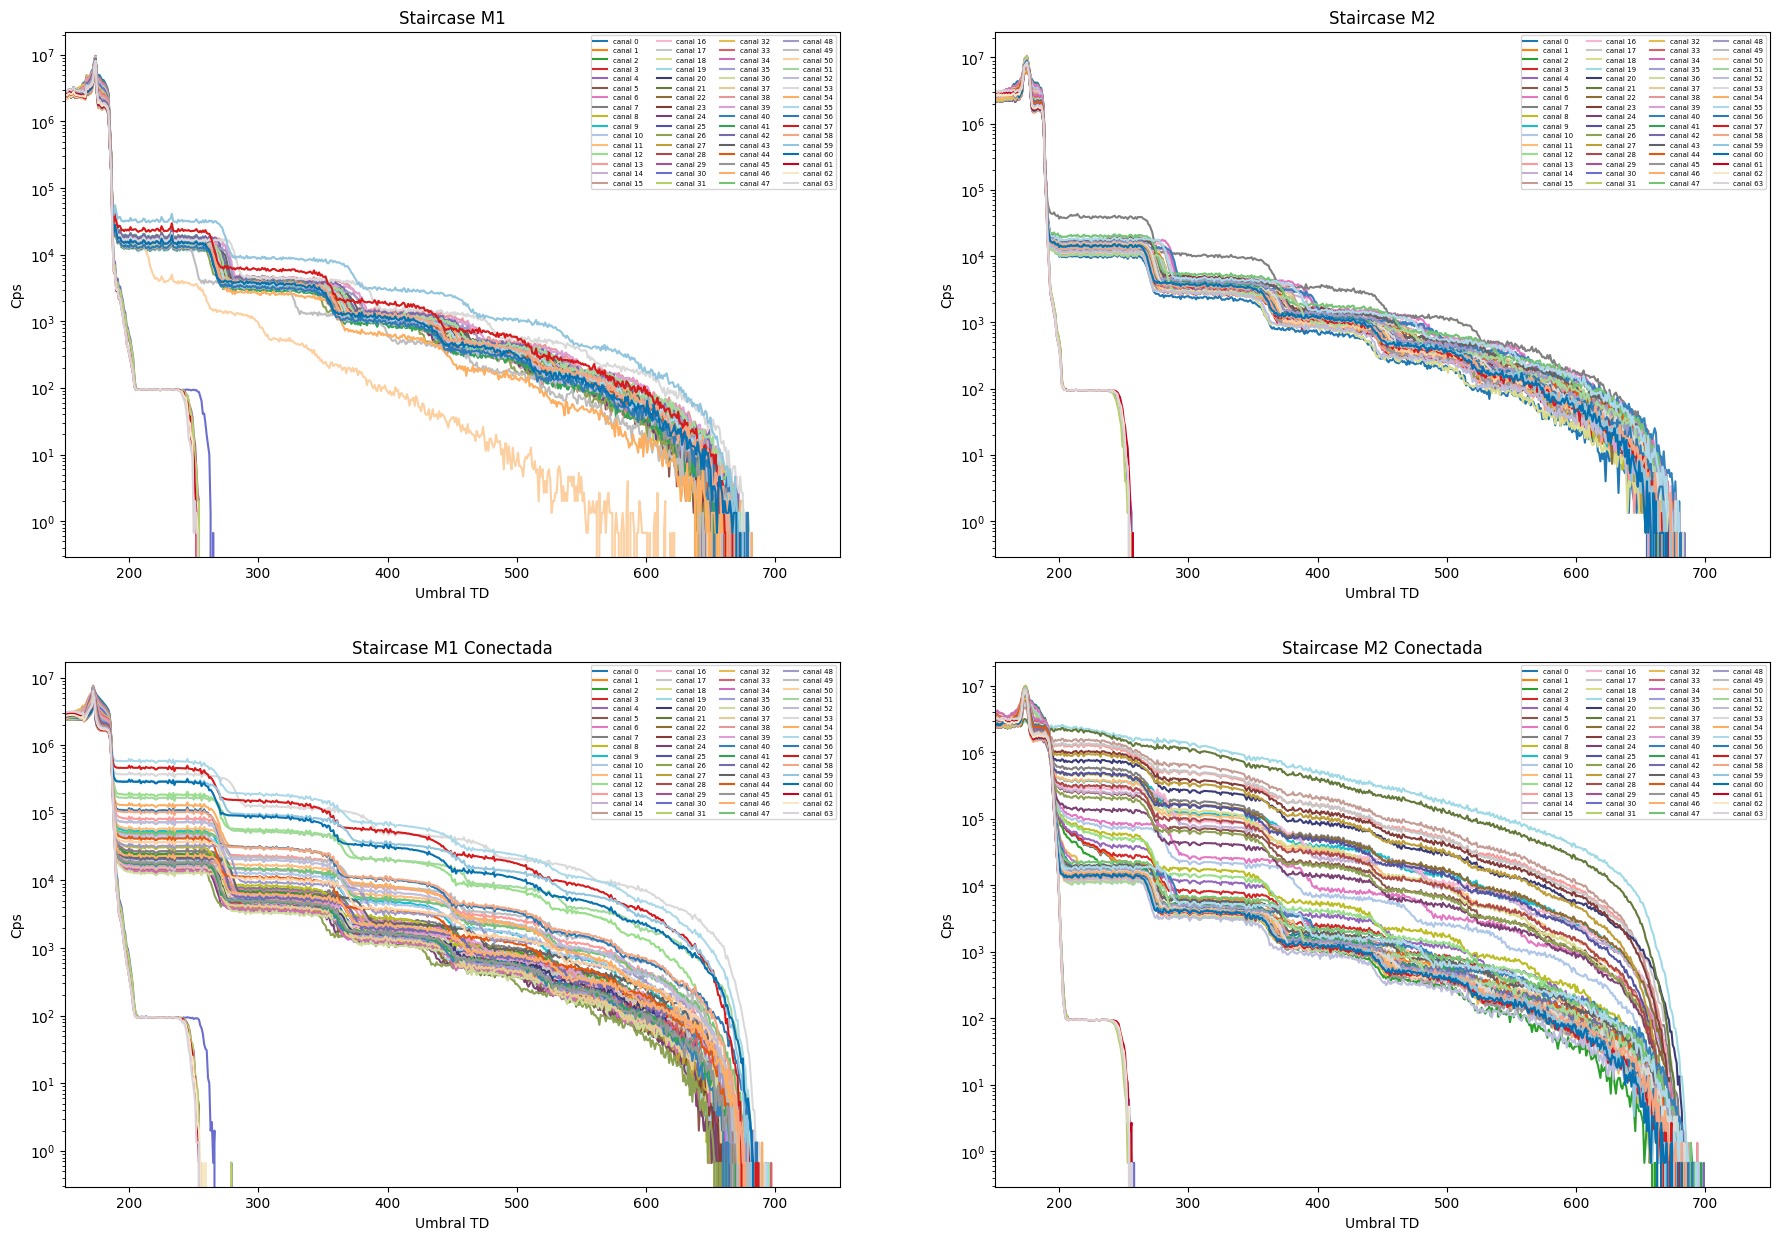

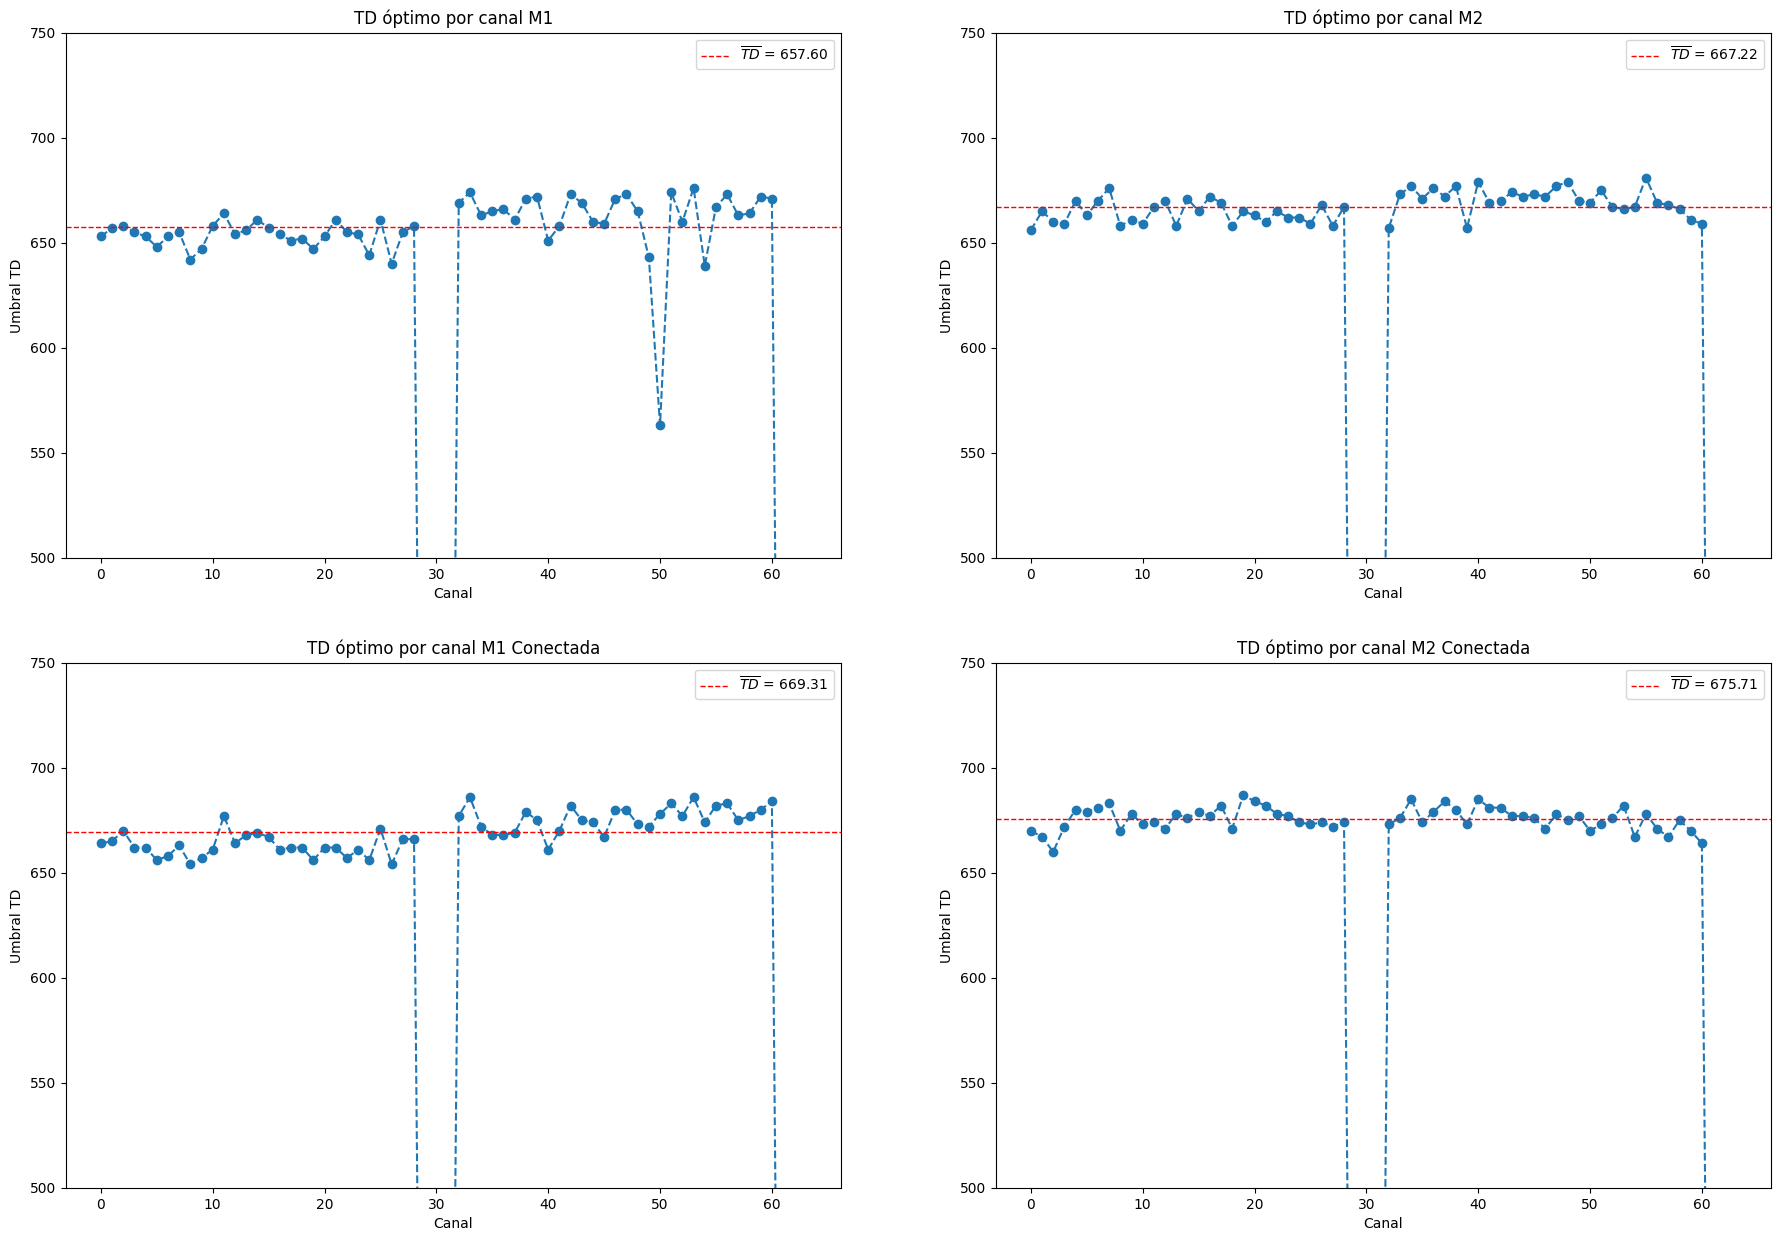

In [ ]:
file_list_1 = [f"Datos\StairCaseM1\StairCase_1step\Run1_Staircase_0_{i}.txt" for i in range(0,64)]  # Guarda en una lista los archivos
file_list_2 = [f"Datos\StairCaseM2\StairCase_1step\Run0_Staircase_0_{i}.txt" for i in range(0,64)]
file_list_3 = [f"Datos\StairCaseM1\StairCase_1_step_conectada_matriz\Run1_Staircase_0_{i}.txt" for i in range(0,64)]
file_list_4 = [f"Datos\StairCaseM2\StairCase_1_step_conectada_matriz\Run0_Staircase_0_{i}.txt" for i in range(0,64)]


staircase = [file_list_1, file_list_2, file_list_3, file_list_4]

# Lista para almacenar los DataFrames
df_list = [[],[],[],[]]

# Listas de valores TD para cada canal donde Cps es 0
Td_list = [[],[],[],[]]

# Figura para gráfica de Staircase
fig1, ax1 = plt.subplots(2, 2, figsize=(22, 15))

# Figura para gráfica de puntos de interes de TD
fig2, ax2 = plt.subplots(2, 2, figsize=(22, 15))

# Lista de colores para graficar Staircase
colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5", "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5",
    "#393b79", "#637939", "#8c6d31", "#843c39", "#7b4173", "#5254a3", "#8ca252", "#bd9e39", "#ad494a", "#a55194",
    "#6b6ecf", "#b5cf6b", "#e7ba52", "#d6616b", "#ce6dbd", "#9c9ede", "#cedb9c", "#e7cb94", "#e7969c", "#de9ed6",
    "#3182bd", "#31a354", "#756bb1", "#636363", "#e6550d", "#969696", "#fdae6b", "#74c476", "#9e9ac8", "#bdbdbd",
    "#fdd0a2", "#a1d99b", "#bcbddc", "#d9d9d9", "#fdae61", "#abd9e9", "#2c7bb6", "#d7191c", "#f4a582", "#92c5de",
    "#0571b0", "#ca0020", "#f6e8c3", "#d9d3d9"
]


for m in range(len(staircase)):
    # index de la figura
    c = m%2 # columna
    f = m//2 # fila
    
    # Lista de canales
    canales = []
    # Leer cada archivo y almacenarlo en la lista
    for i in range(0,len(file_list_1)):
        
        df = pd.read_csv(staircase[m][i], sep=r'\s+', names=["Threshold TD", "Cps"]) # Crea el dataframe de la i-ésimo canal
        
        ax1[f][c].plot(df["Threshold TD"].values, df["Cps"].values, color=colors[i], label=f"canal {i}") # graficar el staircase de cada canal
        
        Td_list[m].append(df.loc[df["Cps"] == 0., "Threshold TD"].values[0])  # Obtener el primer valor de "TD" donde Cps = 0
        canales.append(i)
        
        df_list[m].append(df)

    # Obtiene el promedio de cada staircase
    val = []
    for j in Td_list[m]:
        if j >500 :
            val.append(j)
    mean = np.mean(val)
    
    # Se ajusta el plot del staircase en escala log
    ax1[f][c].set_yscale("log")
    ax1[f][c].set_xlabel("Umbral TD")
    ax1[f][c].set_ylabel("Cps")
    ax1[f][c].legend(ncol=4, loc="upper right", bbox_to_anchor=(1, 1), fontsize=5)# se ajusta la leyenda para que quepa: bbox.. = posición, fontsize= tamaño de letra

    # Plot del Threshold óptimo
    ax2[f][c].scatter(canales, Td_list[m])
    ax2[f][c].plot(canales, Td_list[m], linestyle="--") # plot con puntos conectados con rayas
    ax2[f][c].axhline(y=mean, color='red', label=rf"$\overline{{TD}}$ = {mean:.2f}", linestyle='--', linewidth=1)
    ax2[f][c].set_xlabel("Canal")
    ax2[f][c].set_ylabel("Umbral TD")
    ax2[f][c].set_ylim([500,750])
    ax2[f][c].legend()

ax1[0][0].set_title("Staircase M1")
ax1[0][1].set_title("Staircase M2")
ax1[1][0].set_title("Staircase M1 Conectada")
ax1[1][1].set_title("Staircase M2 Conectada")
ax1[0][0].set_xlim(150,750)
ax1[0][1].set_xlim(150,750)
ax1[1][0].set_xlim(150,750)
ax1[1][1].set_xlim(150,750)

ax2[0][0].set_title("TD óptimo por canal M1")
ax2[0][1].set_title("TD óptimo por canal M2")
ax2[1][0].set_title("TD óptimo por canal M1 Conectada")
ax2[1][1].set_title("TD óptimo por canal M2 Conectada")

In [6]:
print(Td_list)

[[680, 690, 690, 680, 680, 670, 670, 680, 670, 680, 670, 680, 670, 680, 680, 210, 670, 680, 680, 670, 680, 680, 670, 670, 660, 690, 670, 690, 680, 670, 210, 210, 690, 700, 690, 690, 690, 680, 690, 690, 680, 680, 690, 690, 690, 680, 700, 690, 690, 450, 690, 690, 690, 700, 700, 690, 690, 690, 700, 690, 690, 210, 210], [656, 665, 660, 659, 670, 663, 670, 676, 658, 661, 659, 667, 670, 658, 671, 665, 672, 669, 658, 665, 663, 660, 665, 662, 662, 659, 668, 658, 667, 100, 100, 100, 657, 673, 677, 671, 676, 672, 677, 657, 679, 669, 670, 674, 672, 673, 672, 677, 679, 670, 669, 675, 667, 666, 667, 681, 669, 668, 666, 661, 659, 100, 100], []]
